# Wine Point Prediction

## Importing Libraries

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load Data

Load and checkout the data from the dataset

In [29]:
df = pd.read_csv('../data/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


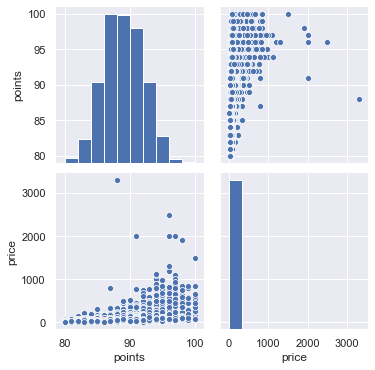

In [31]:
sns.pairplot(df)

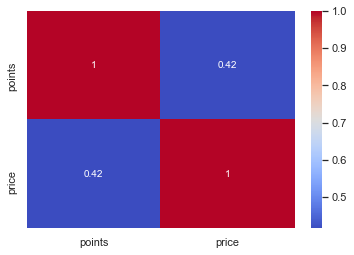

In [32]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## Prepare Data

In [33]:
df.drop(axis=1, columns=['taster_twitter_handle','title','winery','variety','designation'], inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   region_2     50511 non-null   object 
 7   taster_name  103727 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [35]:
df[['region_1', 'region_2']] = df[['region_1', 'region_2']].notnull().astype(int)

Country and province data is valuable but as there's a few null values then we decided to remove them from the data.

In [55]:
print("Country null count: ", df['country'].isnull().sum().sum())
print("Province null count: ", df['province'].isnull().sum().sum())

print(df.shape)

print(df.isna().sum())

df = df.dropna(subset=["country", "province", "price", "taster_name"])

print(df.shape)

Country null count:  0
Province null count:  0
(88244, 8)
country        0
description    0
points         0
price          0
province       0
region_1       0
region_2       0
taster_name    0
dtype: int64
(88244, 8)


We will also have a look if there's any duplicates and remove them from the data.

In [52]:
df[df['description'].duplicated(keep = False)].sort_values('description').head()

,country,description,points,price,province,region_1,region_2,taster_name


In [53]:
df = df.drop_duplicates('description')


In [82]:
x_list = list(df)
x_list.remove('points')
y_list = ['points']
print(x_list)
print(y_list)

X = df[x_list]
y = df[y_list]

['country', 'description', 'price', 'province', 'region_1', 'region_2', 'taster_name']
['points']


One Hot Encoder

In [56]:
from sklearn.preprocessing import OneHotEncoder

categorical_feature_mask = X.dtypes==object
categorical_feature_mask

country         True
description     True
price          False
province        True
region_1       False
region_2       False
taster_name     True
dtype: bool

In [88]:
ohe = OneHotEncoder(sparse=False)

X_ohe = ohe.fit_transform(X)
X_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
X_dict = X.to_dict(orient='records')

[{'country': 'Portugal',
  'description': "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
  'price': 15.0,
  'province': 'Douro',
  'region_1': 0,
  'region_2': 0,
  'taster_name': 'Roger Voss'},
 {'country': 'US',
  'description': 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
  'price': 14.0,
  'province': 'Oregon',
  'region_1': 1,
  'region_2': 1,
  'taster_name': 'Paul Gregutt'},
 {'country': 'US',
  'description': 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
  'price': 13.0,
  'province': 'Michigan',
  'r

In [63]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False)
# sparse = False makes the output is not a sparse matrix

In [64]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# vocabulary
vocab = dv_X.vocabulary_

{'country=Portugal': 30,
 "description=This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.": 73002,
 'price': 88286,
 'province=Douro': 88392,
 'region_1': 88704,
 'region_2': 88705,
 'taster_name=Roger Voss': 88721,
 'country=US': 39,
 'description=Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.': 55666,
 'province=Oregon': 88550,
 'taster_name=Paul Gregutt': 88720,
 'description=Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.': 44529,
 'province=Michigan': 88500,
 'taster_name=Alexander Peartree': 88706,
 "description=Much li

In [ ]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
# X head
X.head()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Training

In [86]:
X_train.country

116375           US
31587     Australia
45349            US
106039           US
17393         Italy
            ...    
8517         France
78569            US
111929       France
1126         France
21595            US
Name: country, Length: 70595, dtype: object

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'US'

In [17]:
# from sklearn.naive_bayes import GaussianNB

# nb_model = GaussianNB()
#
# nb_model.fit(X_train, y_train)

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()

print(X_train.columns)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

Index(['price'], dtype='object')


/usr/local/anaconda3/envs/mandatory-2/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

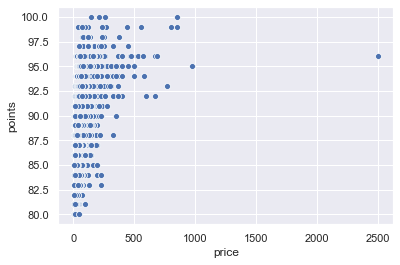

In [20]:
sns.scatterplot(
    x='price',
    y='points',
    data=X_test.join(y_test, how='outer')
)

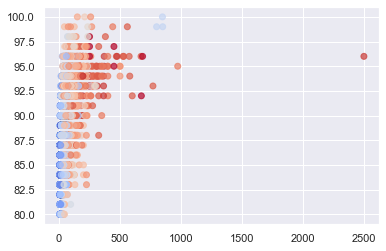

In [21]:
plt.scatter(
    X_test['price'],
    y_test['points'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [22]:
confusion_matrix(y_test, y_pred)


array([[ 13,   5,   7,   5,   9,  16,   8,  17,   1,   5,   2,   2,   2,
          1,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   3,  10,  11,  18,  19,  10,  24,   1,   9,   3,   3,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [ 24,  17,  22,  15,  23,  46,  37,  89,   9,  26,   6,  15,   4,
          1,   0,   0,   0,   0,   0,   0,   0],
       [ 46,  20,  40,  29,  55,  80,  74, 138,  14,  35,  11,  15,   1,
          6,   0,   0,   0,   0,   0,   0,   0],
       [108,  35,  76,  50,  94, 177, 153, 289,  30,  68,  22,  32,  13,
         15,   0,   0,   0,   0,   0,   0,   0],
       [125,  38, 109,  84, 114, 230, 214, 475,  31, 130,  27,  72,  10,
         23,   1,   0,   0,   0,   0,   0,   0],
       [135,  23,  96,  94, 124, 244, 276, 646,  69, 156,  59, 119,  34,
         31,   5,   0,   0,   0,   0,   0,   0],
       [142,  19, 144, 133, 144, 248, 312, 935, 117, 253,  97, 171,  64,
         55,   8,   1,   0,   0,   0,   0,   0],
       [ 75,   4, 119,  

In [23]:
knn.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
knn_acc = knn.score(X_train, y_train) * 100
knn_acc


12.522279142239013

In [25]:
linear_model_y = df.pop('price')
print(linear_model_y)
linear_model_x = df
print(linear_model_x.columns)

1         15.0
2         14.0
3         13.0
4         65.0
5         15.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 111512, dtype: float64
Index(['country', 'description', 'points', 'province', 'region_1', 'region_2',
       'taster_name'],
      dtype='object')


In [26]:
print('Points and price predictions:')
print('KNeighborsClassifier score: ', knn_acc)


Points and price predictions:
KNeighborsClassifier score:  12.522279142239013
